<a href="https://colab.research.google.com/github/tasmimjoti/PDAC/blob/main/PDAC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
import sklearn
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, normalize
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GroupKFold, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_score, recall_score, f1_score, fbeta_score, matthews_corrcoef, log_loss
import torch
from numpy import loadtxt
from torch.utils.data import DataLoader
from tqdm import tqdm
from collections import Counter
from xgboost import XGBClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/PDAC ML/GSE133684_GeneLevel_Raw_data.csv", header = None)

<ipython-input-3-a5dbeb4613d4>:1: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,2

In [ ]:
df1.shape

(35414, 403)

In [ ]:
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,393,394,395,396,397,398,399,400,401,402
0,NaN,gene_symbol,GSM3914463,GSM3914464,GSM3914465,GSM3914466,GSM3914467,GSM3914468,GSM3914469,GSM3914470,...,GSM4065742,GSM4065743,GSM4065744,GSM4065745,GSM4065746,GSM4065747,GSM4065748,GSM4065749,GSM4065750,GSM4065751
1,ENSG00000000003,TSPAN6,69,0,57,138,82,0,0,44,...,8,27,3,4,0,0,0,11,27,13
2,ENSG00000000005,TNMD,9,0,21,75,0,0,0,0,...,0,0,12,6,0,0,0,0,37,0
3,ENSG00000000419,DPM1,170,25,386,113,119,220,203,440,...,80,55,39,55,17,35,43,249,152,79
4,ENSG00000000457,SCYL3,207,11,219,529,137,184,24,258,...,112,177,46,87,23,11,167,67,13,108


In [ ]:
df1.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35414 entries, 0 to 35413
Data columns (total 403 columns):
 #    Column  Non-Null Count  Dtype 
---   ------  --------------  ----- 
 0    0       35413 non-null  object
 1    1       35414 non-null  object
 2    2       35414 non-null  object
 3    3       35414 non-null  object
 4    4       35414 non-null  object
 5    5       35414 non-null  object
 6    6       35414 non-null  object
 7    7       35414 non-null  object
 8    8       35414 non-null  object
 9    9       35414 non-null  object
 10   10      35414 non-null  object
 11   11      35414 non-null  object
 12   12      35414 non-null  object
 13   13      35414 non-null  object
 14   14      35414 non-null  object
 15   15      35414 non-null  object
 16   16      35414 non-null  object
 17   17      35414 non-null  object
 18   18      35414 non-null  object
 19   19      35414 non-null  object
 20   20      35414 non-null  object
 21   21      35414 non-null  object
 2

In [ ]:
df1 = df1.T
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,35404,35405,35406,35407,35408,35409,35410,35411,35412,35413
0,NaN,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,...,ENSG00000283678,ENSG00000283680,ENSG00000283682,ENSG00000283683,ENSG00000283685,ENSG00000283688,ENSG00000283690,ENSG00000283694,ENSG00000283697,ENSG00000283699
1,gene_symbol,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,...,MIR6830,OR11K1P,MIR548AH,MYOCOS,MIR522,MIR6715B,MIR3116-2,MIR3202-2,HSFX3,MIR4481
2,GSM3914463,69,9,170,207,96,1935,41,51,157,...,0,0,0,2,0,0,0,0,0,0
3,GSM3914464,0,0,25,11,15,66,1,5,64,...,0,0,0,0,0,0,0,0,0,0
4,GSM3914465,57,21,386,219,117,1271,54,79,163,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df1.columns = df1.iloc[0]
df1 = df1.iloc[1: ].reset_index(drop = True)

In [ ]:
df1.head()

,NaN,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,...,ENSG00000283678,ENSG00000283680,ENSG00000283682,ENSG00000283683,ENSG00000283685,ENSG00000283688,ENSG00000283690,ENSG00000283694,ENSG00000283697,ENSG00000283699
0,gene_symbol,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,...,MIR6830,OR11K1P,MIR548AH,MYOCOS,MIR522,MIR6715B,MIR3116-2,MIR3202-2,HSFX3,MIR4481
1,GSM3914463,69,9,170,207,96,1935,41,51,157,...,0,0,0,2,0,0,0,0,0,0
2,GSM3914464,0,0,25,11,15,66,1,5,64,...,0,0,0,0,0,0,0,0,0,0
3,GSM3914465,57,21,386,219,117,1271,54,79,163,...,0,0,0,0,0,0,0,0,0,0
4,GSM3914466,138,75,113,529,247,6247,2483,101,782,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df1.columns = df1.iloc[0]
df1 = df1.iloc[1: ].reset_index(drop = True)

In [ ]:
df1.head()

,gene_symbol,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,...,MIR6830,OR11K1P,MIR548AH,MYOCOS,MIR522,MIR6715B,MIR3116-2,MIR3202-2,HSFX3,MIR4481
0,GSM3914463,69,9,170,207,96,1935,41,51,157,...,0,0,0,2,0,0,0,0,0,0
1,GSM3914464,0,0,25,11,15,66,1,5,64,...,0,0,0,0,0,0,0,0,0,0
2,GSM3914465,57,21,386,219,117,1271,54,79,163,...,0,0,0,0,0,0,0,0,0,0
3,GSM3914466,138,75,113,529,247,6247,2483,101,782,...,0,0,0,0,0,0,0,0,0,0
4,GSM3914467,82,0,119,137,1,561,0,89,182,...,0,0,0,3,0,0,0,0,0,0


In [ ]:
df2 = df1.copy()

In [ ]:
df2.head()

,gene_symbol,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,...,MIR6830,OR11K1P,MIR548AH,MYOCOS,MIR522,MIR6715B,MIR3116-2,MIR3202-2,HSFX3,MIR4481
0,GSM3914463,69,9,170,207,96,1935,41,51,157,...,0,0,0,2,0,0,0,0,0,0
1,GSM3914464,0,0,25,11,15,66,1,5,64,...,0,0,0,0,0,0,0,0,0,0
2,GSM3914465,57,21,386,219,117,1271,54,79,163,...,0,0,0,0,0,0,0,0,0,0
3,GSM3914466,138,75,113,529,247,6247,2483,101,782,...,0,0,0,0,0,0,0,0,0,0
4,GSM3914467,82,0,119,137,1,561,0,89,182,...,0,0,0,3,0,0,0,0,0,0


In [ ]:
df2.rename(columns = {'gene_symbol':'Sample_Names'}, inplace = True)

In [ ]:
df2.head()

,Sample_Names,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,...,MIR6830,OR11K1P,MIR548AH,MYOCOS,MIR522,MIR6715B,MIR3116-2,MIR3202-2,HSFX3,MIR4481
0,GSM3914463,69,9,170,207,96,1935,41,51,157,...,0,0,0,2,0,0,0,0,0,0
1,GSM3914464,0,0,25,11,15,66,1,5,64,...,0,0,0,0,0,0,0,0,0,0
2,GSM3914465,57,21,386,219,117,1271,54,79,163,...,0,0,0,0,0,0,0,0,0,0
3,GSM3914466,138,75,113,529,247,6247,2483,101,782,...,0,0,0,0,0,0,0,0,0,0
4,GSM3914467,82,0,119,137,1,561,0,89,182,...,0,0,0,3,0,0,0,0,0,0


In [ ]:
df2.to_csv("Raw_data.csv", index = False)

In [ ]:
df3 = pd.read_csv("Raw_data.csv")

In [ ]:
df3.head()

,Sample_Names,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,...,MIR6830,OR11K1P,MIR548AH,MYOCOS,MIR522,MIR6715B,MIR3116-2,MIR3202-2,HSFX3,MIR4481
0,GSM3914463,69,9,170,207,96,1935,41,51,157,...,0,0,0,2,0,0,0,0,0,0
1,GSM3914464,0,0,25,11,15,66,1,5,64,...,0,0,0,0,0,0,0,0,0,0
2,GSM3914465,57,21,386,219,117,1271,54,79,163,...,0,0,0,0,0,0,0,0,0,0
3,GSM3914466,138,75,113,529,247,6247,2483,101,782,...,0,0,0,0,0,0,0,0,0,0
4,GSM3914467,82,0,119,137,1,561,0,89,182,...,0,0,0,3,0,0,0,0,0,0


#**Importing metadata**

In [ ]:
md = pd.read_csv("/content/drive/MyDrive/PDAC ML/GSE133684_filtered_metadata.csv")

In [ ]:
md.head()

,Unnamed: 0,characteristics,tissue,disease state,disease.state.ch1,tissue.ch1
0,GSM3914463,PDAC_001,Plasma,PDAC,PDAC,Plasma
1,GSM3914464,PDAC_002,Plasma,PDAC,PDAC,Plasma
2,GSM3914465,PDAC_003,Plasma,PDAC,PDAC,Plasma
3,GSM3914466,PDAC_004,Plasma,PDAC,PDAC,Plasma
4,GSM3914467,PDAC_005,Plasma,PDAC,PDAC,Plasma


In [ ]:
md.rename(columns = {'Unnamed: 0':'Sample_Names'}, inplace = True)

In [ ]:
md.head()

,Sample_Names,characteristics,tissue,disease state,disease.state.ch1,tissue.ch1
0,GSM3914463,PDAC_001,Plasma,PDAC,PDAC,Plasma
1,GSM3914464,PDAC_002,Plasma,PDAC,PDAC,Plasma
2,GSM3914465,PDAC_003,Plasma,PDAC,PDAC,Plasma
3,GSM3914466,PDAC_004,Plasma,PDAC,PDAC,Plasma
4,GSM3914467,PDAC_005,Plasma,PDAC,PDAC,Plasma


In [ ]:
md['disease state'].unique()

array(['PDAC', 'healthy'], dtype=object)

In [ ]:
type(md['disease state'][1])

str

In [ ]:
df3.shape

(401, 35414)

In [ ]:
md.shape

(401, 6)

###**Merging raw data and metadata**

In [ ]:
dfm = pd.merge(df3, md[["Sample_Names", "disease state"]], on = "Sample_Names", how = "left")

In [ ]:
dfm.head()

,Sample_Names,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,...,OR11K1P,MIR548AH,MYOCOS,MIR522,MIR6715B,MIR3116-2,MIR3202-2,HSFX3,MIR4481,disease state
0,GSM3914463,69,9,170,207,96,1935,41,51,157,...,0,0,2,0,0,0,0,0,0,PDAC
1,GSM3914464,0,0,25,11,15,66,1,5,64,...,0,0,0,0,0,0,0,0,0,PDAC
2,GSM3914465,57,21,386,219,117,1271,54,79,163,...,0,0,0,0,0,0,0,0,0,PDAC
3,GSM3914466,138,75,113,529,247,6247,2483,101,782,...,0,0,0,0,0,0,0,0,0,PDAC
4,GSM3914467,82,0,119,137,1,561,0,89,182,...,0,0,3,0,0,0,0,0,0,PDAC


In [ ]:
dfm.to_csv("Raw data merged with metadata.csv", index = False)

In [ ]:
dfm.head()

,Sample_Names,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,...,OR11K1P,MIR548AH,MYOCOS,MIR522,MIR6715B,MIR3116-2,MIR3202-2,HSFX3,MIR4481,disease state
0,GSM3914463,69,9,170,207,96,1935,41,51,157,...,0,0,2,0,0,0,0,0,0,PDAC
1,GSM3914464,0,0,25,11,15,66,1,5,64,...,0,0,0,0,0,0,0,0,0,PDAC
2,GSM3914465,57,21,386,219,117,1271,54,79,163,...,0,0,0,0,0,0,0,0,0,PDAC
3,GSM3914466,138,75,113,529,247,6247,2483,101,782,...,0,0,0,0,0,0,0,0,0,PDAC
4,GSM3914467,82,0,119,137,1,561,0,89,182,...,0,0,3,0,0,0,0,0,0,PDAC


In [ ]:
dfm['disease state'].unique()

array(['PDAC', 'healthy'], dtype=object)

In [ ]:
dfm_2 = dfm.copy()

In [ ]:
dfm_2.loc[dfm_2['disease state'] == 'PDAC', 'disease state'] = 1

In [ ]:
dfm_2.loc[dfm_2['disease state'] == 'healthy', 'disease state'] = 0

In [ ]:
dfm_2.head()

,Sample_Names,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,...,OR11K1P,MIR548AH,MYOCOS,MIR522,MIR6715B,MIR3116-2,MIR3202-2,HSFX3,MIR4481,disease state
0,GSM3914463,69,9,170,207,96,1935,41,51,157,...,0,0,2,0,0,0,0,0,0,1
1,GSM3914464,0,0,25,11,15,66,1,5,64,...,0,0,0,0,0,0,0,0,0,1
2,GSM3914465,57,21,386,219,117,1271,54,79,163,...,0,0,0,0,0,0,0,0,0,1
3,GSM3914466,138,75,113,529,247,6247,2483,101,782,...,0,0,0,0,0,0,0,0,0,1
4,GSM3914467,82,0,119,137,1,561,0,89,182,...,0,0,3,0,0,0,0,0,0,1


In [ ]:
dfm_2["disease state"].unique()

array([1, 0], dtype=object)

In [ ]:
dfm_2["disease state"].count()

401

In [ ]:
dfm_2.to_csv("raw data & filtered metadata.csv", index = False)

#**Importing the final csv file**

In [ ]:
df = pd.read_csv("raw data & filtered metadata.csv")

In [ ]:
df.head()

,Sample_Names,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,...,OR11K1P,MIR548AH,MYOCOS,MIR522,MIR6715B,MIR3116-2,MIR3202-2,HSFX3,MIR4481,disease state
0,GSM3914463,69,9,170,207,96,1935,41,51,157,...,0,0,2,0,0,0,0,0,0,1
1,GSM3914464,0,0,25,11,15,66,1,5,64,...,0,0,0,0,0,0,0,0,0,1
2,GSM3914465,57,21,386,219,117,1271,54,79,163,...,0,0,0,0,0,0,0,0,0,1
3,GSM3914466,138,75,113,529,247,6247,2483,101,782,...,0,0,0,0,0,0,0,0,0,1
4,GSM3914467,82,0,119,137,1,561,0,89,182,...,0,0,3,0,0,0,0,0,0,1


In [ ]:
df.columns

Index(['Sample_Names', 'TSPAN6', 'TNMD', 'DPM1', 'SCYL3', 'C1orf112', 'FGR',
       'CFH', 'FUCA2', 'GCLC',
       ...
       'OR11K1P', 'MIR548AH', 'MYOCOS', 'MIR522', 'MIR6715B', 'MIR3116-2',
       'MIR3202-2', 'HSFX3', 'MIR4481', 'disease state'],
      dtype='object', length=35415)

In [ ]:
df.shape

(401, 35415)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Columns: 35415 entries, Sample_Names to disease state
dtypes: int64(35414), object(1)
memory usage: 108.3+ MB


#**Separating "x" and "y"**

In [ ]:
x = df.drop(["Sample_Names", "disease state"], axis = 1)

In [ ]:
y = df[["disease state"]]

#**Oversampling**

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
random = RandomOverSampler(random_state = 42)
x_new, y_new = random.fit_resample(x, y)

In [ ]:
x_new.shape

(568, 35413)

#**Splitting the train and test data**



In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x_new, y_new, test_size = 0.2, random_state = 1)

In [ ]:
print(f"Train data shape : {xtrain.shape}\nTest data shape: {xtest.shape}")

Train data shape : (454, 35413)
Test data shape: (114, 35413)


#**Confusion Matrix**

In [ ]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)

    A = (((C.T)/(C.sum(axis = 1))).T)
    B = (C/C.sum(axis = 0))

    plt.figure(figsize = (20, 4))
    labels = [1, 2]
    sns.set_style("darkgrid")

    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot = True , fmt = ".3f", xticklabels = labels, yticklabels = labels)
    colors=['#011f4b', '#03396c', '#005b96', '#6497b1', '#b3cde0']
    sns.set_palette(sns.color_palette(colors))
    plt.xlabel("Predicted class")
    plt.ylabel("Original class")
    plt.title("Confusion matrix")

    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot = True , fmt = ".3f", xticklabels = labels, yticklabels = labels)
    plt.xlabel("Predicted class")
    plt.ylabel("Original class")
    plt.title("Precision matrix")

    plt.subplot(1, 3, 3)
    sns.heatmap(A, annot = True , fmt = ".3f", xticklabels = labels, yticklabels = labels)
    plt.xlabel("Predicted class")
    plt.ylabel("Original class")
    plt.title("Recall matrix")

    plt.show()

def curve(a, rf_fpr, rf_tpr, rf_auc):
  plt.plot(rf_fpr, rf_tpr, marker='.', label= a + "(AUROC = %0.3f)" % rf_auc)

  plt.title('ROC plot without oversampling')

  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')

  plt.legend()

  plt.show()

#**All scores**

In [ ]:
def score_generate(xtestt, ytestt, preds, model):

    accuracy = metrics.accuracy_score(ytestt, preds)
    print('accuracy ',accuracy)
    precision_positive = metrics.precision_score(ytestt, preds, pos_label=1)
    precision_negative = metrics.precision_score(ytestt, preds, pos_label=0)


    print('precision_positive ',precision_positive)
    print('precision_negative ',precision_negative)

    recall_sensitivity = metrics.recall_score(ytestt, preds, pos_label=1)
    recall_specificity = metrics.recall_score(ytestt, preds, pos_label=0)
    print('recall_sensitivity ',recall_sensitivity)
    print('recall_specificity ',recall_specificity)

    f1_positive = metrics.f1_score(ytestt, preds, pos_label=1)
    f1_negative = metrics.f1_score(ytestt, preds, pos_label=0)


    print('f1_positive score ',f1_positive)
    print('f1_negative score ',f1_negative)



    print(metrics.classification_report(ytestt, preds))






    hamming_loss = metrics.hamming_loss(ytestt, preds)
    print('hamming_loss ',hamming_loss )


    logloss = metrics.log_loss(ytestt, model.predict_proba(xtestt))
    print('log loss ',logloss)


    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve

    # Import necessary modules
    from sklearn.metrics import roc_curve

    y_score1 = model.predict_proba(xtestt)[:,1]
    false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(ytestt, y_score1)
    print('roc_auc_score for ', model,' : ', roc_auc_score(ytestt, y_score1))
    sns.set_style('darkgrid')

    # Compute predicted probabilities: y_pred_prob
    y_pred_prob = model.predict_proba(xtestt)[:,1]

    # Generate ROC curve values: fpr, tpr, thresholds
    fpr, tpr, thresholds = roc_curve(ytestt, y_pred_prob)

    # Plot ROC curve
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()


#**Applying models**

##**Logistic Regression**

###**Without tuning**

In [ ]:
logit = LogisticRegression()

In [ ]:
logit.fit(xtrain, ytrain)
logit.score(xtest, ytest)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9912280701754386

accuracy  1.0
precision_positive  1.0
precision_negative  1.0
recall_sensitivity  1.0
recall_specificity  1.0
f1_positive score  1.0
f1_negative score  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       227
           1       1.00      1.00      1.00       227

    accuracy                           1.00       454
   macro avg       1.00      1.00      1.00       454
weighted avg       1.00      1.00      1.00       454

hamming_loss  0.0
log loss  1.6380477784916446e-08
roc_auc_score for  LogisticRegression()  :  0.9999999999999999


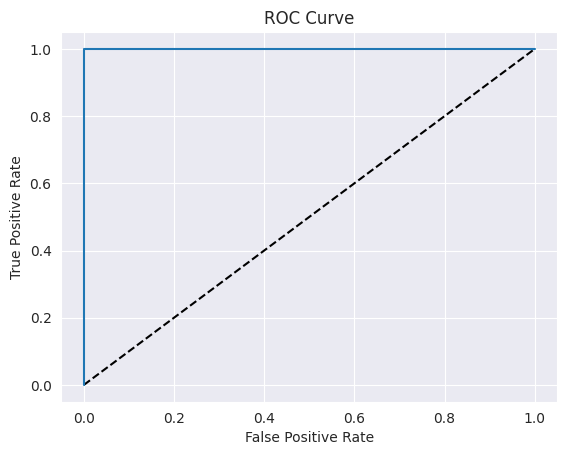

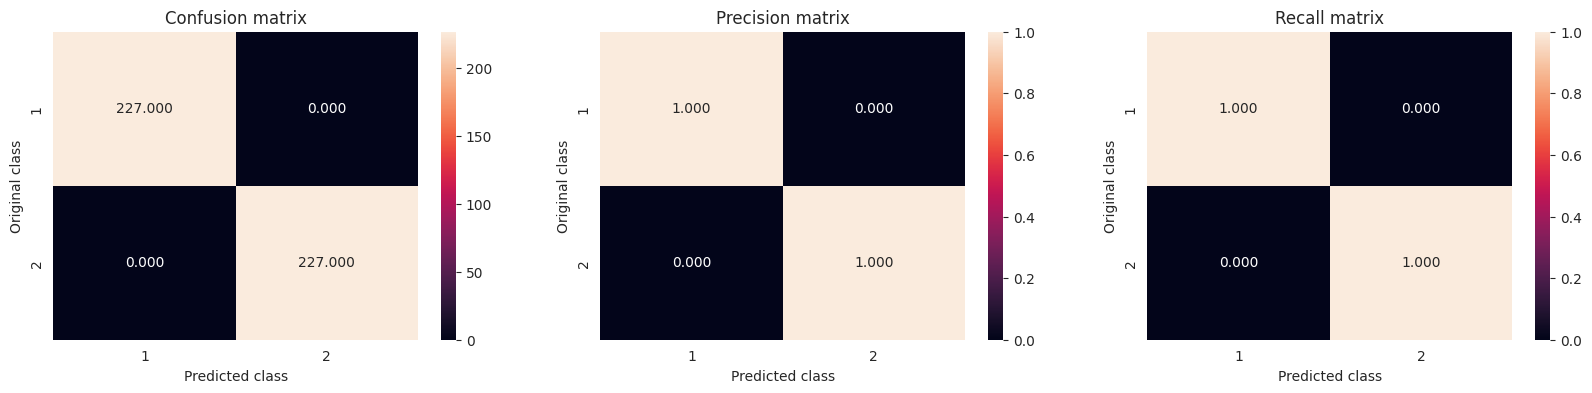

In [ ]:
y_pred_train = logit.predict(xtrain)
score_generate(xtrain, ytrain, y_pred_train, logit)
plot_confusion_matrix(ytrain, y_pred_train)
#score_generate(xtest, y_actual, preds, model):
#y_pred_train = logit.predict(xtrain)
#xtest, y_actual, preds, model
#score_generate(xtrain, ytrain, y_pred_train, logit)
#plot_confusion_matrix(ytrain, y_pred_train)

accuracy  0.9912280701754386
precision_positive  1.0
precision_negative  0.9827586206896551
recall_sensitivity  0.9824561403508771
recall_specificity  1.0
f1_positive score  0.9911504424778761
f1_negative score  0.9913043478260869
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        57
           1       1.00      0.98      0.99        57

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

hamming_loss  0.008771929824561403
log loss  0.3210333523845433
roc_auc_score for  LogisticRegression()  :  0.9926131117266851


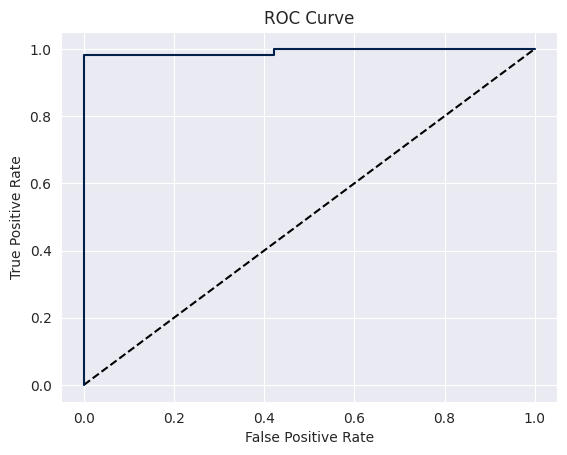

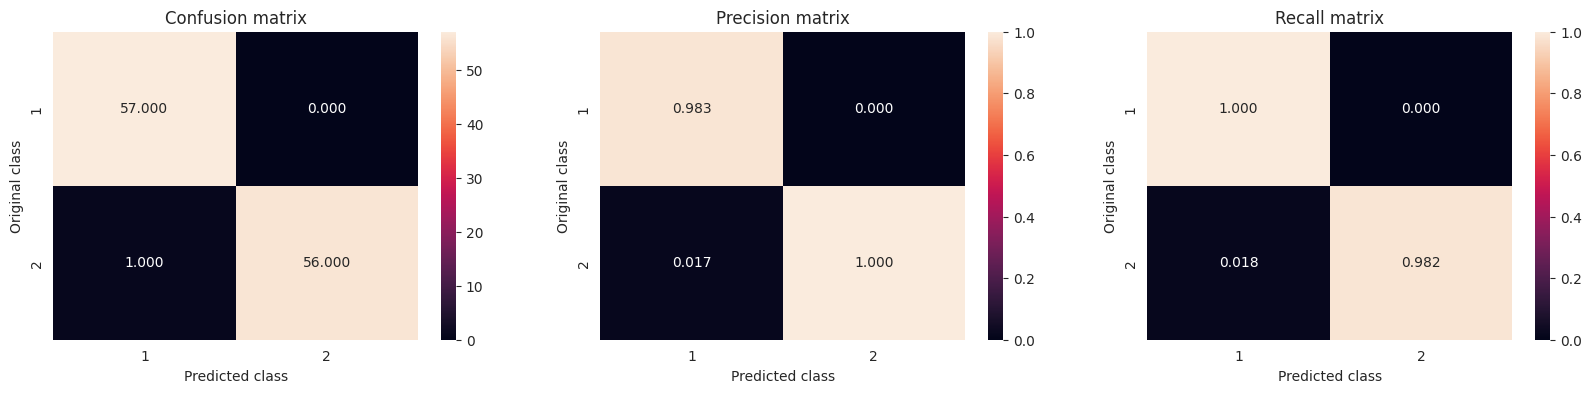

In [ ]:
y_pred = logit.predict(xtest)
score_generate(xtest, ytest, y_pred, logit)
plot_confusion_matrix(ytest, y_pred)

##**Random Forest Classifier**

###**Without tuning**

In [ ]:
rf = RandomForestClassifier(n_estimators = 100, min_samples_split = 2, min_samples_leaf = 4, max_features = 'sqrt', max_depth = 80, bootstrap = False, random_state = 1)

In [ ]:
rf.fit(xtrain, ytrain)
rf.score(xtest, ytest)

<ipython-input-58-01def2b12a93>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(xtrain, ytrain)


0.9824561403508771

accuracy  1.0
precision_positive  1.0
precision_negative  1.0
recall_sensitivity  1.0
recall_specificity  1.0
f1_positive score  1.0
f1_negative score  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       227
           1       1.00      1.00      1.00       227

    accuracy                           1.00       454
   macro avg       1.00      1.00      1.00       454
weighted avg       1.00      1.00      1.00       454

hamming_loss  0.0
log loss  0.054433339013331694
roc_auc_score for  RandomForestClassifier(bootstrap=False, max_depth=80, min_samples_leaf=4,
                       random_state=1)  :  0.9999999999999999


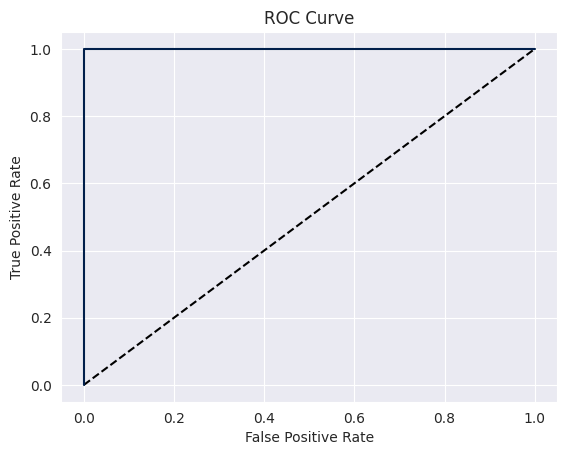

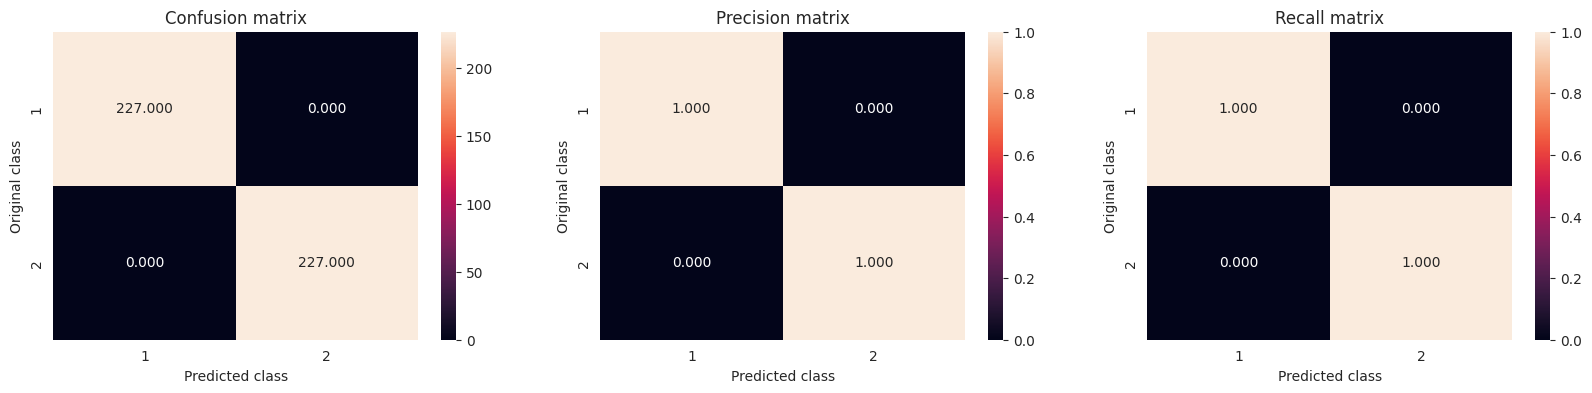

In [ ]:
y_pred_train = rf.predict(xtrain)
score_generate(xtrain, ytrain, y_pred_train, rf)
plot_confusion_matrix(ytrain, y_pred_train)

accuracy  0.9824561403508771
precision_positive  1.0
precision_negative  0.9661016949152542
recall_sensitivity  0.9649122807017544
recall_specificity  1.0
f1_positive score  0.9821428571428572
f1_negative score  0.9827586206896551
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        57
           1       1.00      0.96      0.98        57

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

hamming_loss  0.017543859649122806
log loss  0.18822297038411254
roc_auc_score for  RandomForestClassifier(bootstrap=False, max_depth=80, min_samples_leaf=4,
                       random_state=1)  :  0.9987688519544475


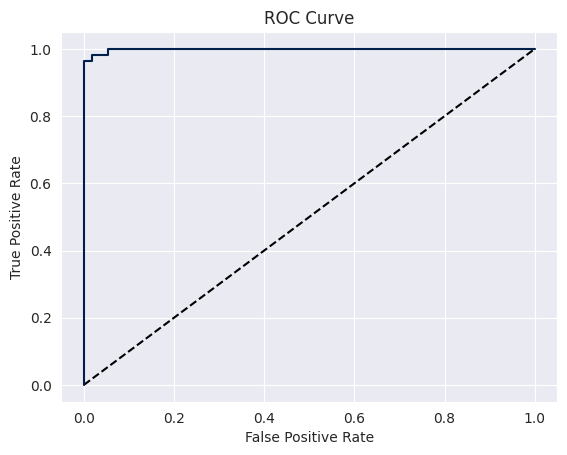

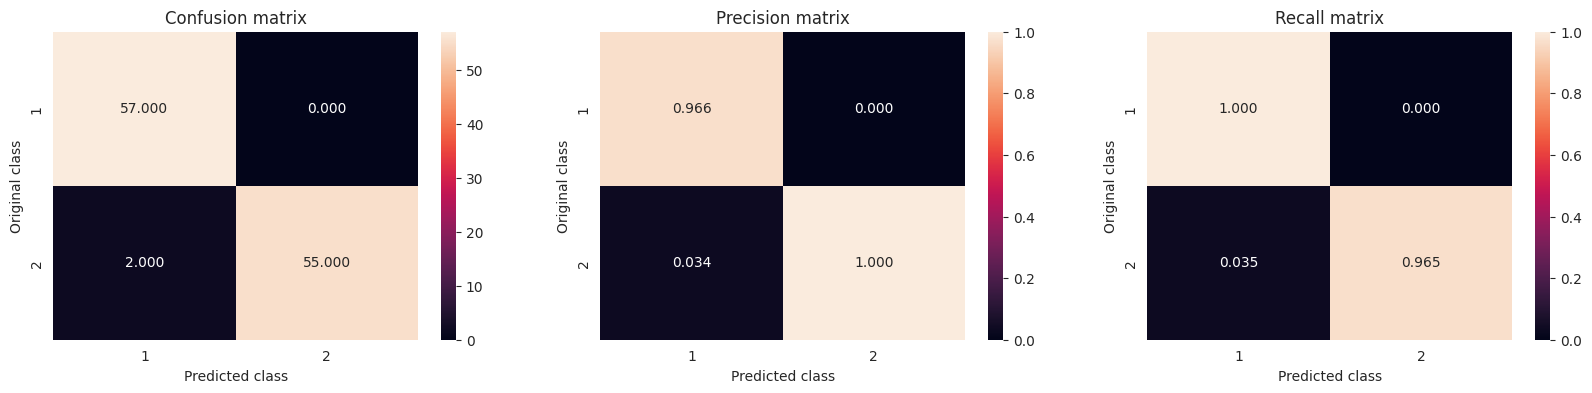

In [ ]:
y_pred = rf.predict(xtest)
score_generate(xtest, ytest, y_pred, rf)
plot_confusion_matrix(ytest, y_pred)

##**Gradient Boosting Classifier**

###**With tuning**

In [ ]:
gb = GradientBoostingClassifier(learning_rate = 0.09280080864073792, max_depth = 5, n_estimators = 613, subsample = 0.8650202519789834, random_state = 1)

In [ ]:
gb.fit(xtrain, ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(learning_rate=0.09280080864073792, max_depth=5,
                           n_estimators=613, random_state=1,
                           subsample=0.8650202519789834)

In [ ]:
gb.score(xtest, ytest)

0.9912280701754386

accuracy  1.0
precision_positive  1.0
precision_negative  1.0
recall_sensitivity  1.0
recall_specificity  1.0
f1_positive score  1.0
f1_negative score  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       227
           1       1.00      1.00      1.00       227

    accuracy                           1.00       454
   macro avg       1.00      1.00      1.00       454
weighted avg       1.00      1.00      1.00       454

hamming_loss  0.0
log loss  1.0722206984651396e-08
roc_auc_score for  GradientBoostingClassifier(learning_rate=0.09280080864073792, max_depth=5,
                           n_estimators=613, random_state=1,
                           subsample=0.8650202519789834)  :  1.0


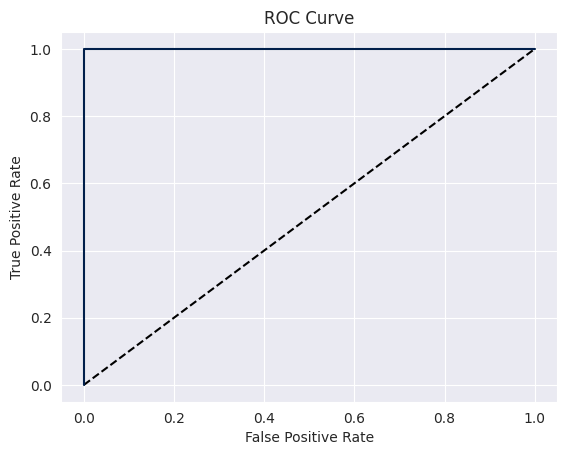

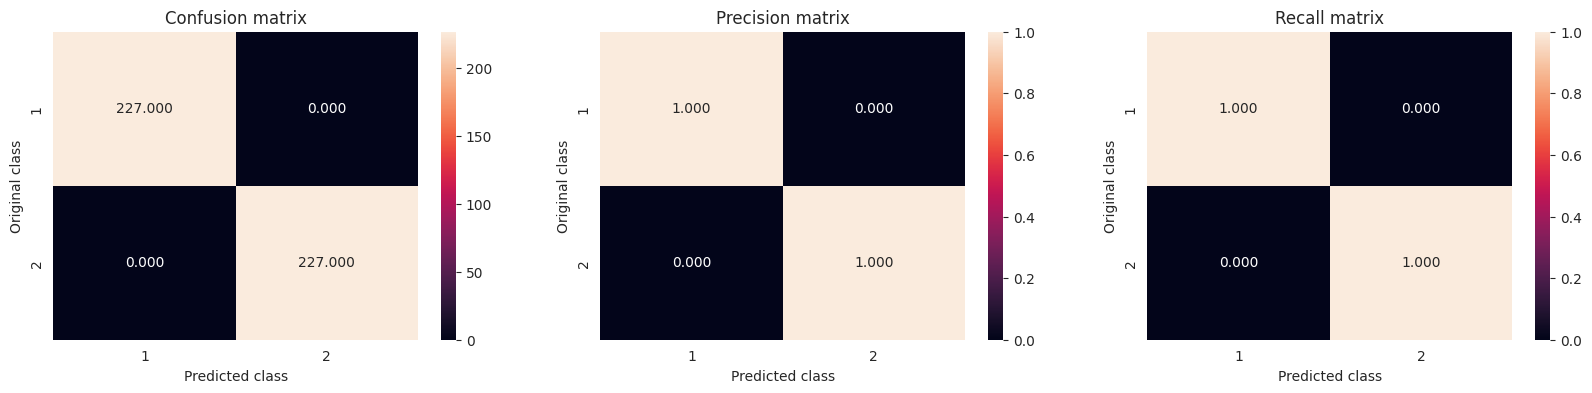

In [ ]:
y_pred_train = gb.predict(xtrain)
score_generate(xtrain, ytrain, y_pred_train, gb)
plot_confusion_matrix(ytrain, y_pred_train)

accuracy  0.9912280701754386
precision_positive  1.0
precision_negative  0.9827586206896551
recall_sensitivity  0.9824561403508771
recall_specificity  1.0
f1_positive score  0.9911504424778761
f1_negative score  0.9913043478260869
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        57
           1       1.00      0.98      0.99        57

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

hamming_loss  0.008771929824561403
log loss  0.0643822431483886
roc_auc_score for  GradientBoostingClassifier(learning_rate=0.09280080864073792, max_depth=5,
                           n_estimators=613, random_state=1,
                           subsample=0.8650202519789834)  :  0.9993844259772238


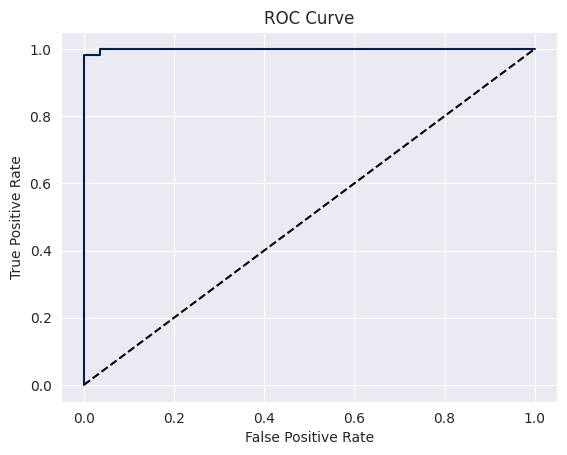

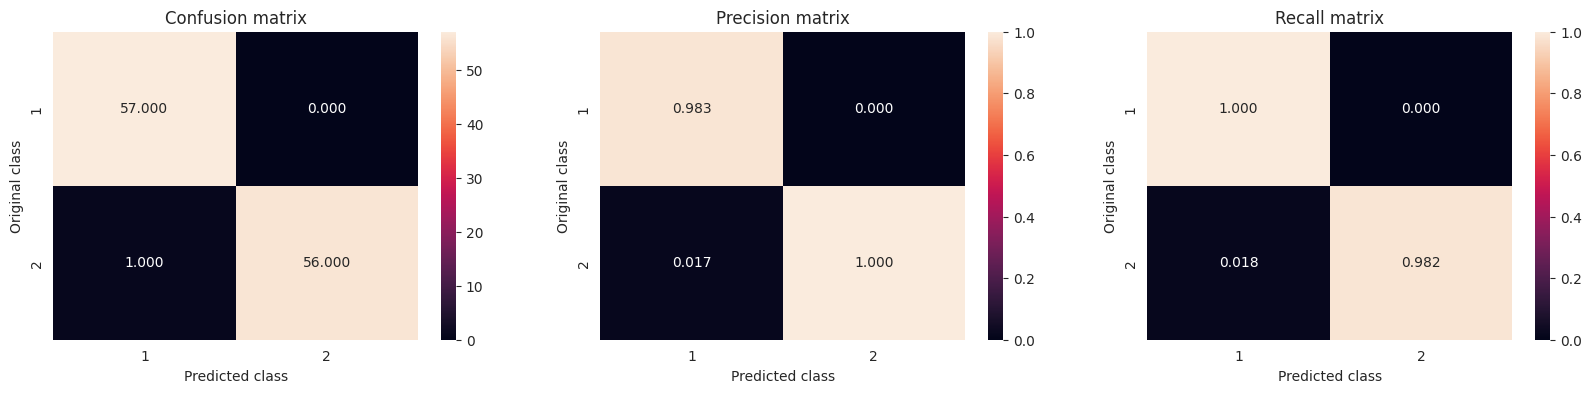

In [ ]:
y_pred = gb.predict(xtest)
score_generate(xtest, ytest, y_pred, gb)
plot_confusion_matrix(ytest, y_pred)

##**SVM Classifier**

###**With tuning**

In [ ]:
svmc = svm.SVC(kernel = "linear", gamma = 1, C = 10, probability = True)
svmc.fit(xtrain, ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=10, gamma=1, kernel='linear', probability=True)

In [ ]:
svmc.score(xtest, ytest)

0.9649122807017544

accuracy  1.0
precision_positive  1.0
precision_negative  1.0
recall_sensitivity  1.0
recall_specificity  1.0
f1_positive score  1.0
f1_negative score  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       227
           1       1.00      1.00      1.00       227

    accuracy                           1.00       454
   macro avg       1.00      1.00      1.00       454
weighted avg       1.00      1.00      1.00       454

hamming_loss  0.0
log loss  0.06370177917550625
roc_auc_score for  SVC(C=10, gamma=1, kernel='linear', probability=True)  :  1.0


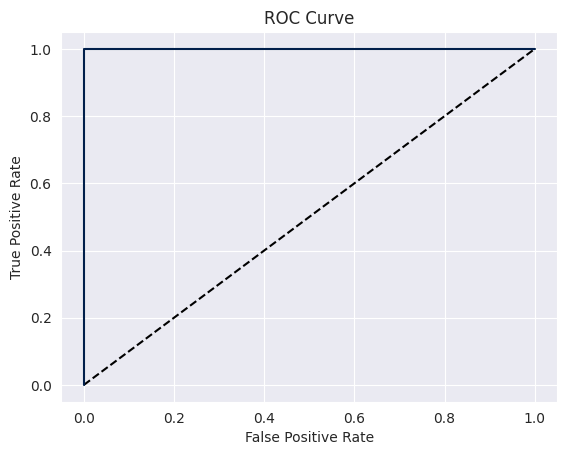

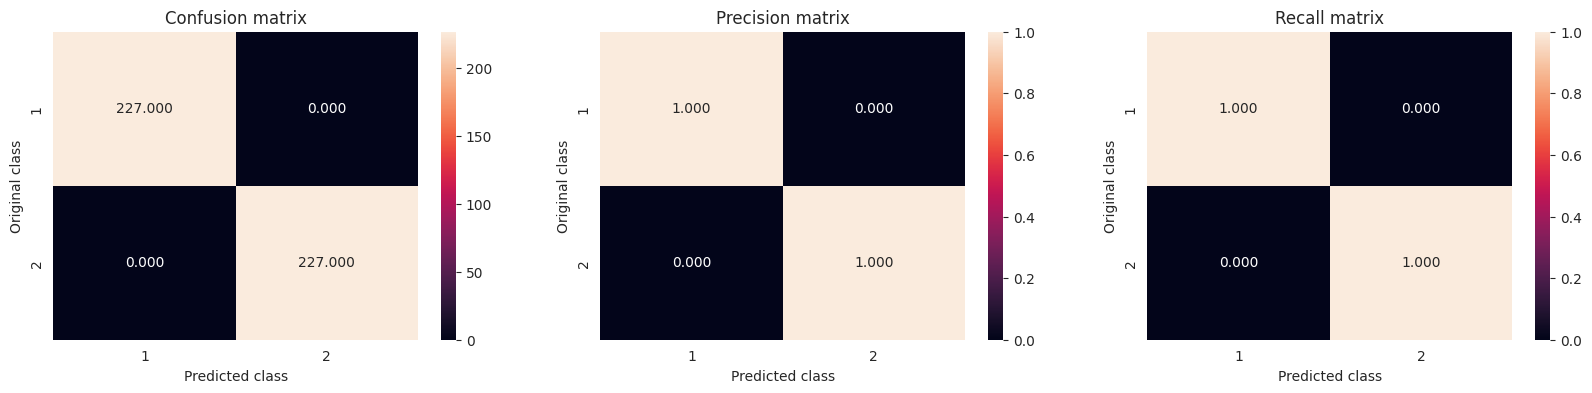

In [ ]:
y_pred_train = svmc.predict(xtrain)
score_generate(xtrain, ytrain, y_pred_train, svmc)
plot_confusion_matrix(ytrain, y_pred_train)

accuracy  0.9649122807017544
precision_positive  1.0
precision_negative  0.9344262295081968
recall_sensitivity  0.9298245614035088
recall_specificity  1.0
f1_positive score  0.9636363636363636
f1_negative score  0.9661016949152543
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        57
           1       1.00      0.93      0.96        57

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

hamming_loss  0.03508771929824561
log loss  0.16991730236109379
roc_auc_score for  SVC(C=10, gamma=1, kernel='linear', probability=True)  :  0.9701446598953523


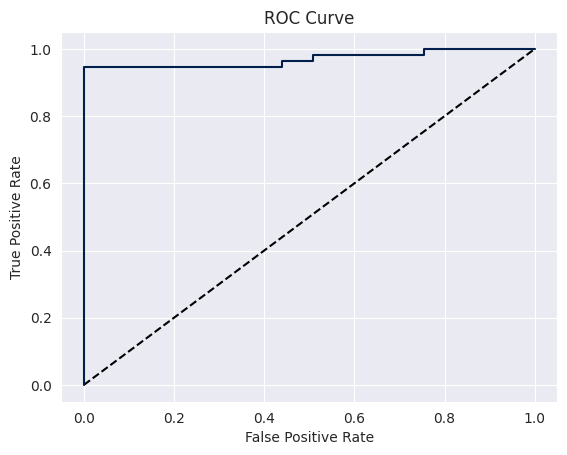

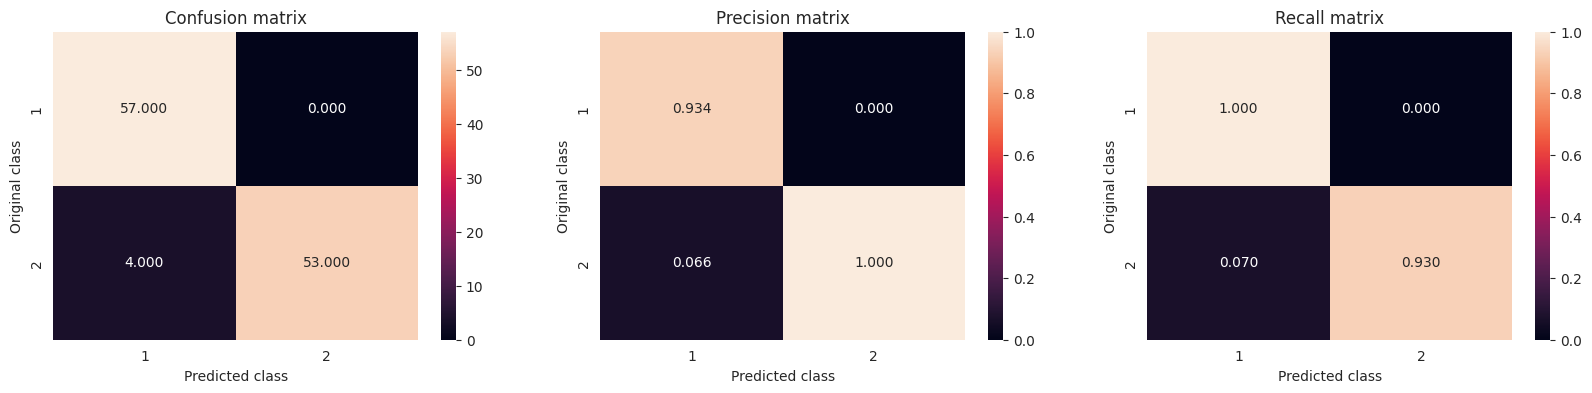

In [ ]:
y_pred = svmc.predict(xtest)
score_generate(xtest, ytest, y_pred, svmc)
plot_confusion_matrix(ytest, y_pred)

##**Decision Tree classifier**

###**Without tuning**

In [ ]:
dtc = DecisionTreeClassifier(random_state = 1)

In [ ]:
dtc.fit(xtrain, ytrain)

DecisionTreeClassifier(random_state=1)

In [ ]:
dtc.score(xtest, ytest)

0.9210526315789473

accuracy  1.0
precision_positive  1.0
precision_negative  1.0
recall_sensitivity  1.0
recall_specificity  1.0
f1_positive score  1.0
f1_negative score  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       227
           1       1.00      1.00      1.00       227

    accuracy                           1.00       454
   macro avg       1.00      1.00      1.00       454
weighted avg       1.00      1.00      1.00       454

hamming_loss  0.0
log loss  2.2204460492503136e-16
roc_auc_score for  DecisionTreeClassifier(random_state=1)  :  1.0


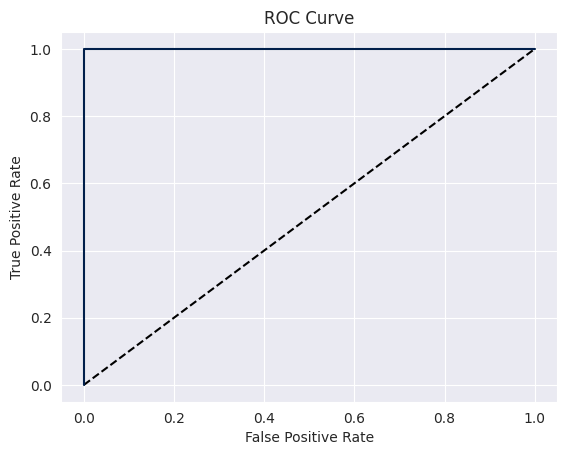

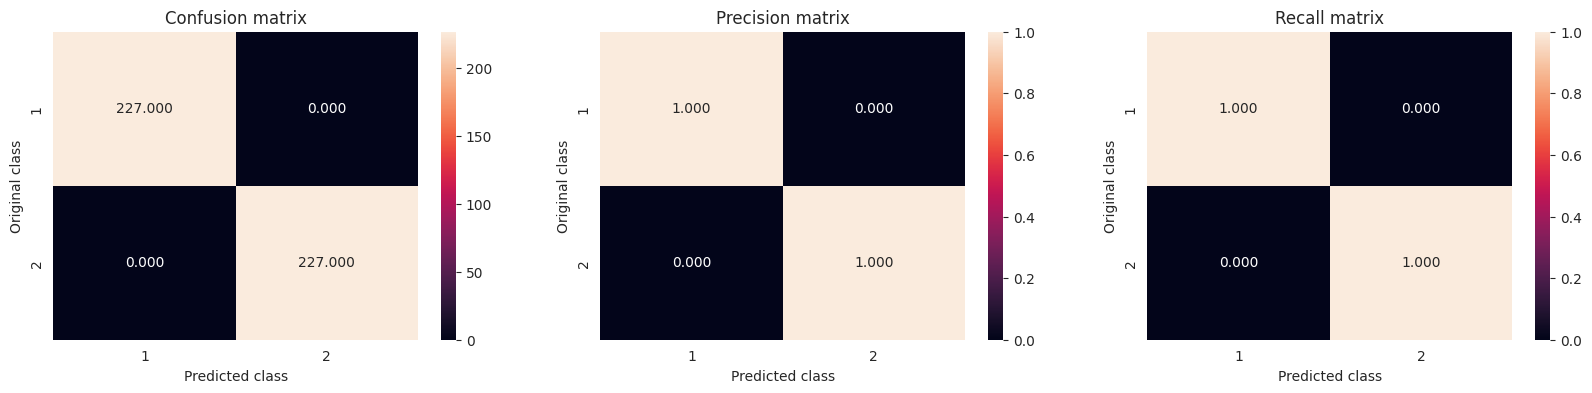

In [ ]:
y_pred_train = dtc.predict(xtrain)
score_generate(xtrain, ytrain, y_pred_train, dtc)
plot_confusion_matrix(ytrain, y_pred_train)

accuracy  0.9210526315789473
precision_positive  0.98
precision_negative  0.875
recall_sensitivity  0.8596491228070176
recall_specificity  0.9824561403508771
f1_positive score  0.9158878504672898
f1_negative score  0.9256198347107438
              precision    recall  f1-score   support

           0       0.88      0.98      0.93        57
           1       0.98      0.86      0.92        57

    accuracy                           0.92       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.92      0.92       114

hamming_loss  0.07894736842105263
log loss  2.8455515833513543
roc_auc_score for  DecisionTreeClassifier(random_state=1)  :  0.9210526315789473


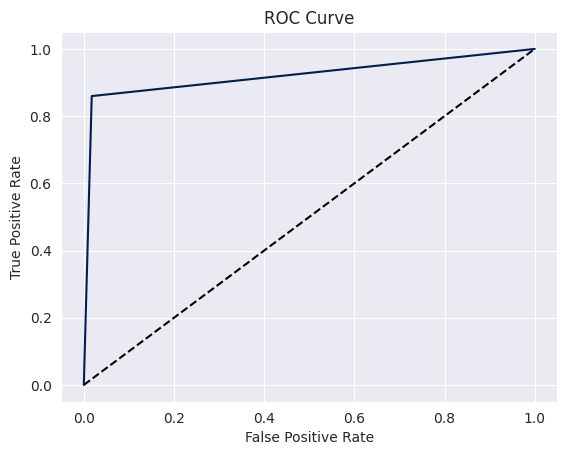

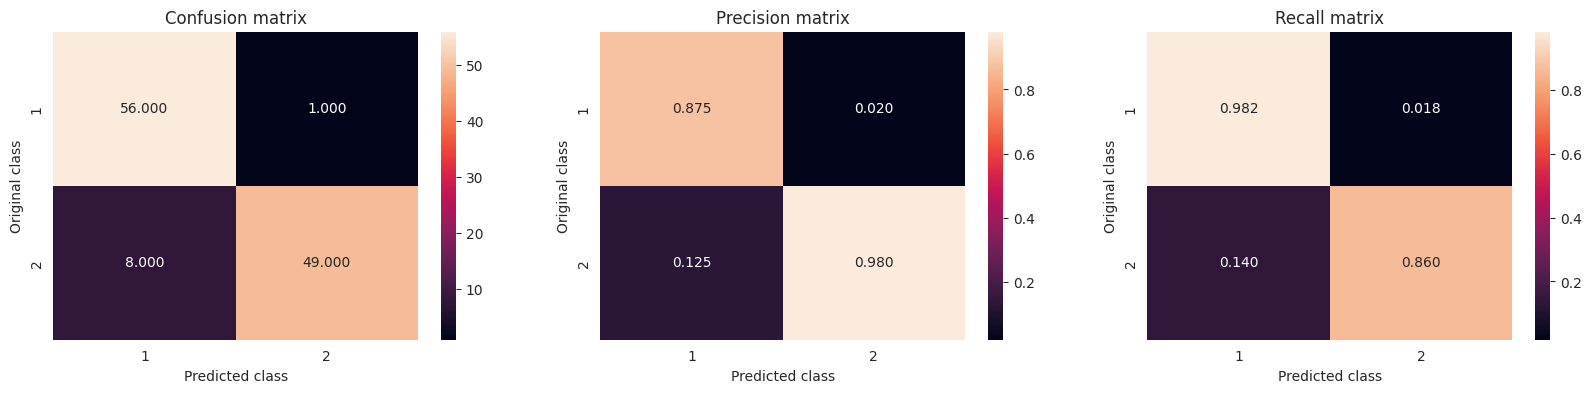

In [ ]:
y_pred = dtc.predict(xtest)
score_generate(xtest, ytest, y_pred, dtc)
plot_confusion_matrix(ytest, y_pred)

##**XGBoost classifier**

###**Without tuning**

In [ ]:
xgb = XGBClassifier()

In [ ]:
xgb.fit(xtrain, ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
xgb.score(xtest, ytest)

0.9649122807017544

accuracy  1.0
precision_positive  1.0
precision_negative  1.0
recall_sensitivity  1.0
recall_specificity  1.0
f1_positive score  1.0
f1_negative score  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       227
           1       1.00      1.00      1.00       227

    accuracy                           1.00       454
   macro avg       1.00      1.00      1.00       454
weighted avg       1.00      1.00      1.00       454

hamming_loss  0.0
log loss  0.004434819518066253
roc_auc_score for  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_thres

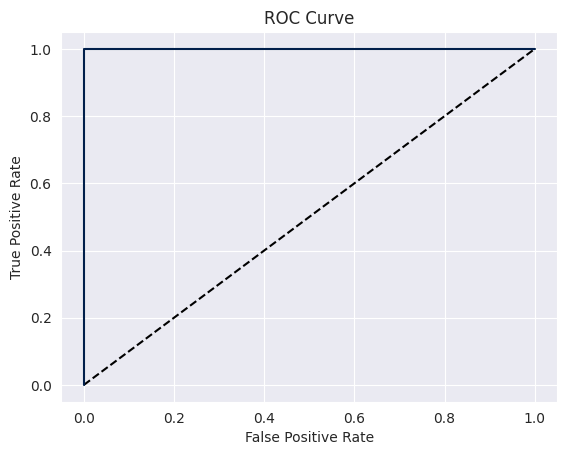

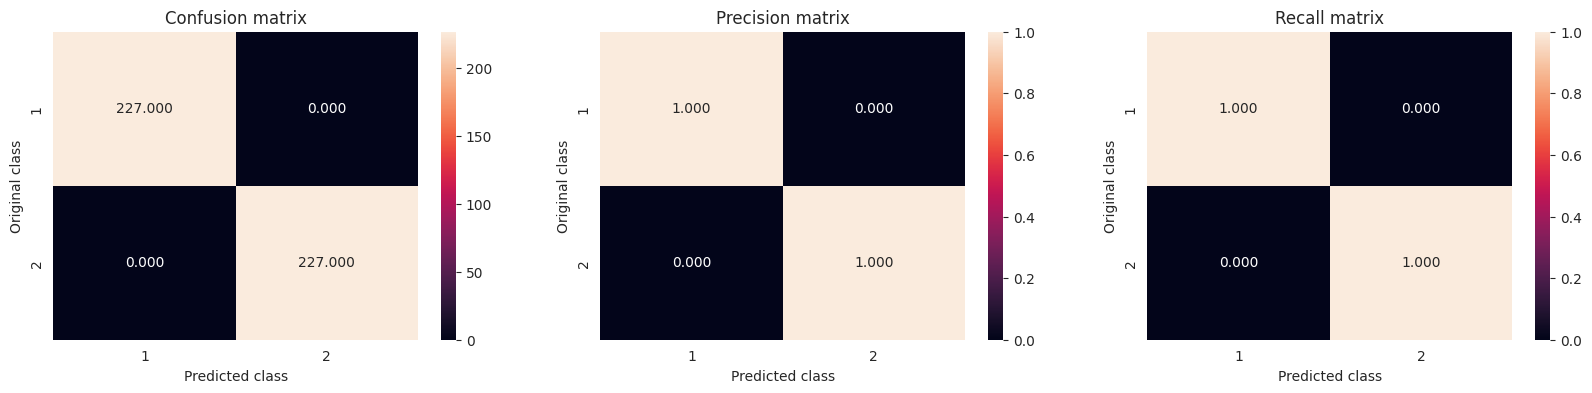

In [ ]:
y_pred_train = xgb.predict(xtrain)
score_generate(xtrain, ytrain, y_pred_train, xgb)
plot_confusion_matrix(ytrain, y_pred_train)

accuracy  0.9649122807017544
precision_positive  1.0
precision_negative  0.9344262295081968
recall_sensitivity  0.9298245614035088
recall_specificity  1.0
f1_positive score  0.9636363636363636
f1_negative score  0.9661016949152543
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        57
           1       1.00      0.93      0.96        57

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

hamming_loss  0.03508771929824561
log loss  0.05980467799969303
roc_auc_score for  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              i

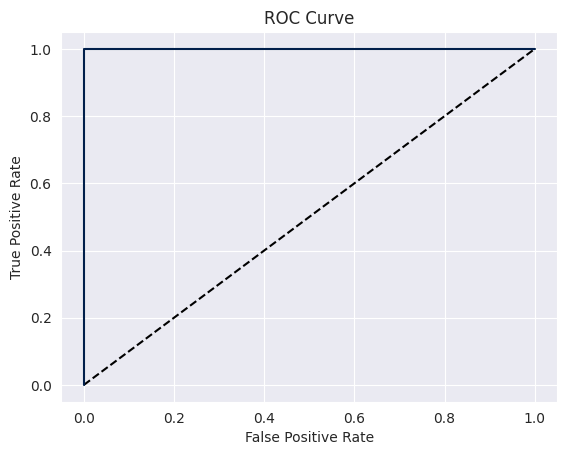

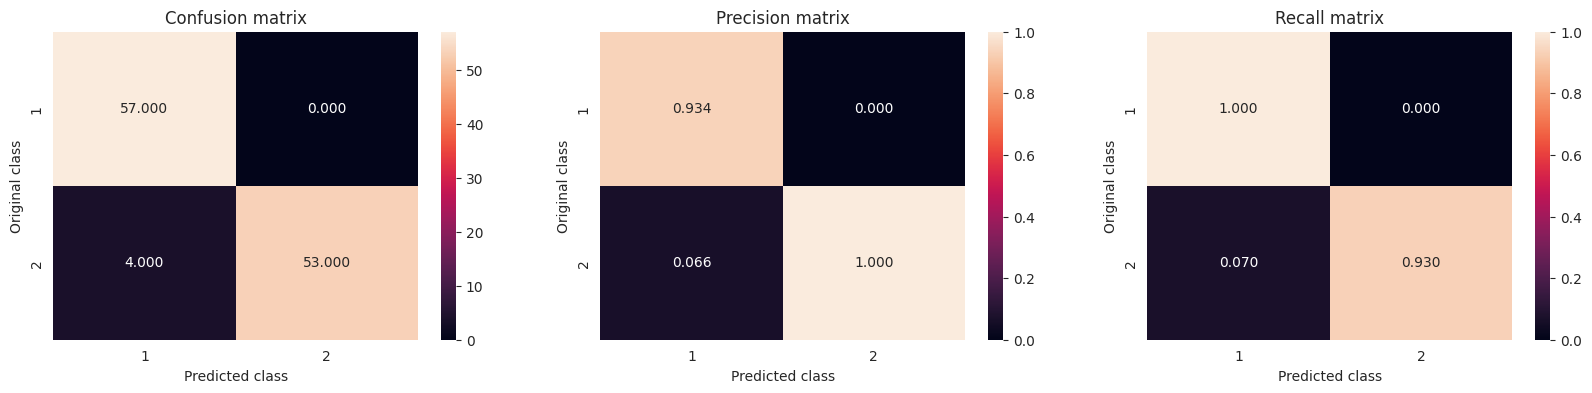

In [ ]:
y_pred = xgb.predict(xtest)
score_generate(xtest, ytest, y_pred, xgb)
plot_confusion_matrix(ytest, y_pred)

##**AdaBoost Classifier**

###**Without tuning**

In [ ]:
abc = AdaBoostClassifier()

In [ ]:
abc.fit(xtrain, ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier()

In [ ]:
abc.score(xtest, ytest)

0.9649122807017544

accuracy  1.0
precision_positive  1.0
precision_negative  1.0
recall_sensitivity  1.0
recall_specificity  1.0
f1_positive score  1.0
f1_negative score  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       227
           1       1.00      1.00      1.00       227

    accuracy                           1.00       454
   macro avg       1.00      1.00      1.00       454
weighted avg       1.00      1.00      1.00       454

hamming_loss  0.0
log loss  0.49811646863925235
roc_auc_score for  AdaBoostClassifier()  :  1.0


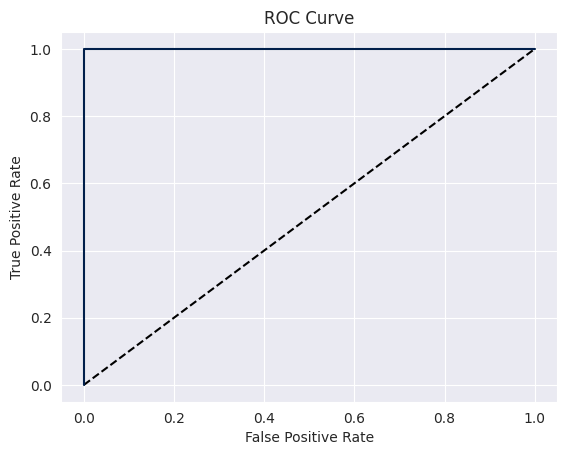

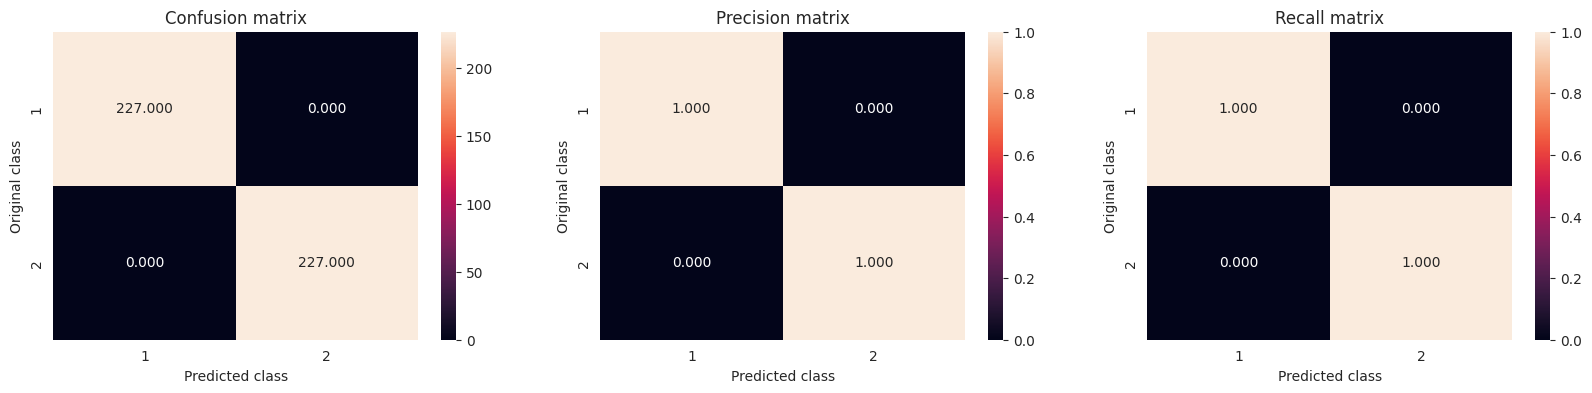

In [ ]:
y_pred_train = abc.predict(xtrain)
score_generate(xtrain, ytrain, y_pred_train, abc)
plot_confusion_matrix(ytrain, y_pred_train)

accuracy  0.9649122807017544
precision_positive  1.0
precision_negative  0.9344262295081968
recall_sensitivity  0.9298245614035088
recall_specificity  1.0
f1_positive score  0.9636363636363636
f1_negative score  0.9661016949152543
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        57
           1       1.00      0.93      0.96        57

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

hamming_loss  0.03508771929824561
log loss  0.5293656042336999
roc_auc_score for  AdaBoostClassifier()  :  0.9883040935672515


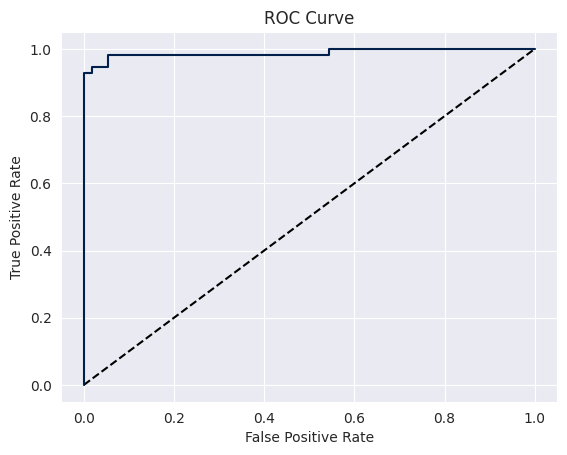

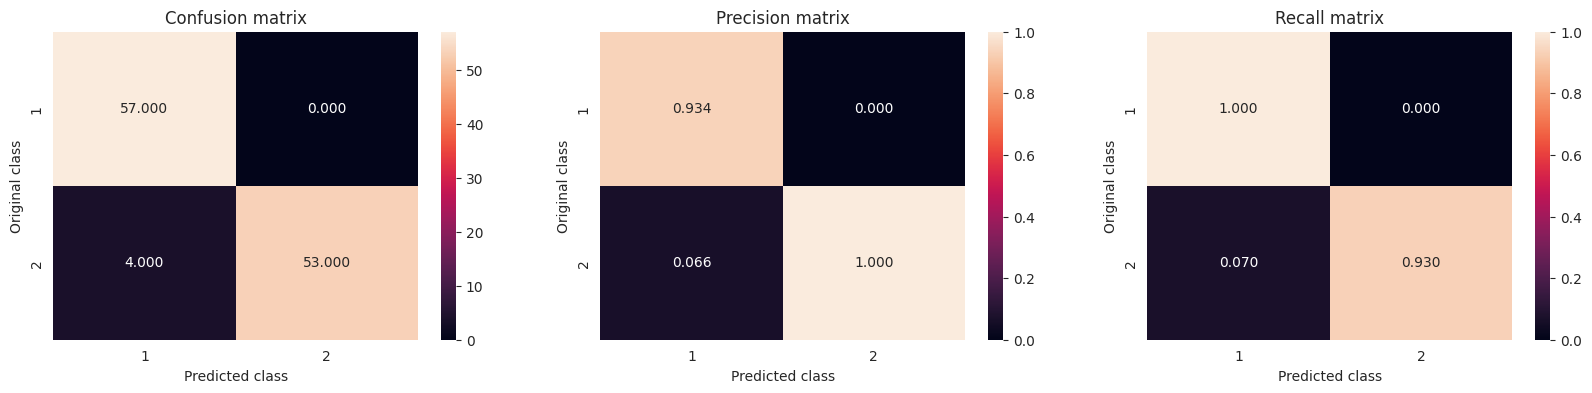

In [ ]:
y_pred = abc.predict(xtest)
score_generate(xtest, ytest, y_pred, abc)
plot_confusion_matrix(ytest, y_pred)

##**KNN classifier**

###**With tuning**

In [ ]:
knn = KNeighborsClassifier(weights = "distance", n_neighbors = 1, metric = "manhattan")

In [ ]:
knn.fit(xtrain, ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='manhattan', n_neighbors=1, weights='distance')

In [ ]:
knn.score(xtest, ytest)

0.9035087719298246

accuracy  1.0
precision_positive  1.0
precision_negative  1.0
recall_sensitivity  1.0
recall_specificity  1.0
f1_positive score  1.0
f1_negative score  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       227
           1       1.00      1.00      1.00       227

    accuracy                           1.00       454
   macro avg       1.00      1.00      1.00       454
weighted avg       1.00      1.00      1.00       454

hamming_loss  0.0
log loss  2.2204460492503136e-16
roc_auc_score for  KNeighborsClassifier(metric='manhattan', n_neighbors=1, weights='distance')  :  1.0


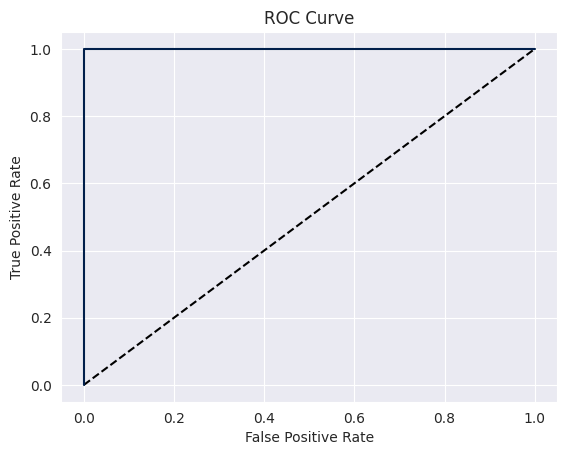

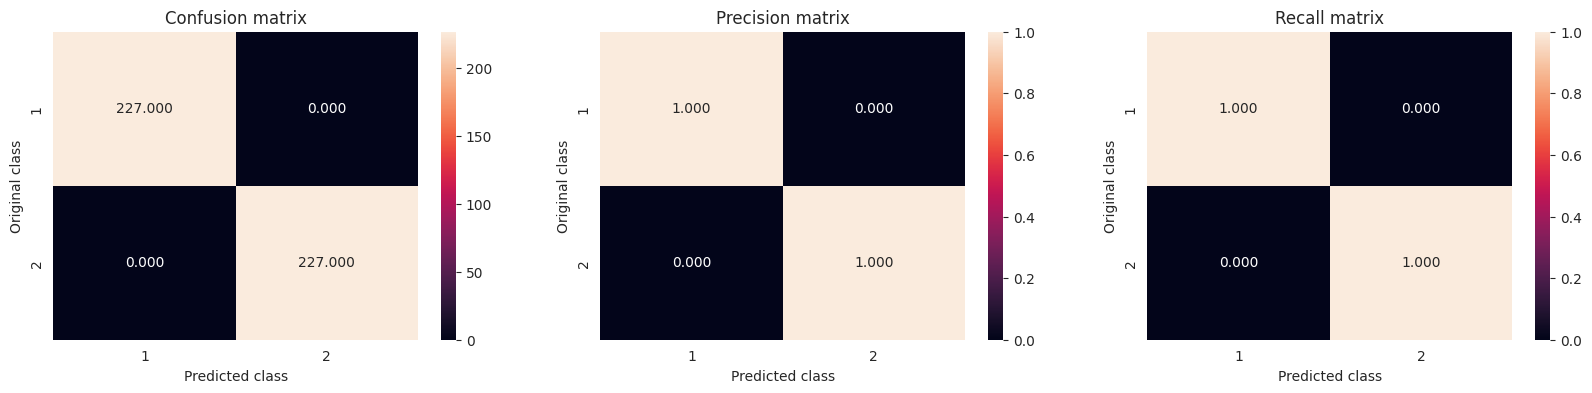

In [ ]:
y_pred_train = knn.predict(xtrain)
score_generate(xtrain, ytrain, y_pred_train, knn)
plot_confusion_matrix(ytrain, y_pred_train)

accuracy  0.9035087719298246
precision_positive  1.0
precision_negative  0.8382352941176471
recall_sensitivity  0.8070175438596491
recall_specificity  1.0
f1_positive score  0.8932038834951457
f1_negative score  0.9119999999999999
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        57
           1       1.00      0.81      0.89        57

    accuracy                           0.90       114
   macro avg       0.92      0.90      0.90       114
weighted avg       0.92      0.90      0.90       114

hamming_loss  0.09649122807017543
log loss  3.477896379651655
roc_auc_score for  KNeighborsClassifier(metric='manhattan', n_neighbors=1, weights='distance')  :  0.9035087719298245


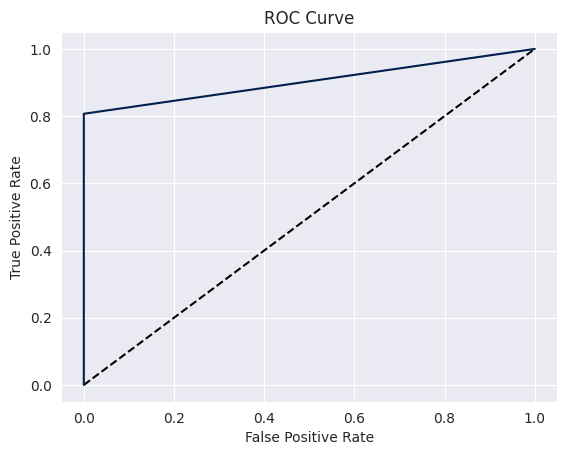

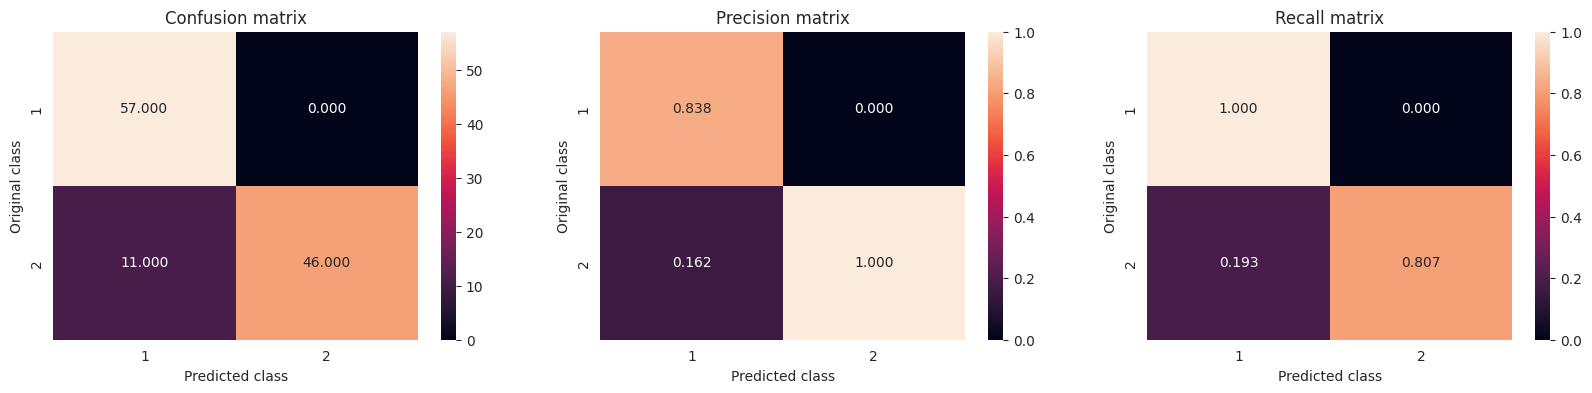

In [ ]:
y_pred = knn.predict(xtest)
score_generate(xtest, ytest, y_pred, knn)
plot_confusion_matrix(ytest, y_pred)